In [1]:
import os
import time
import requests
from collections import OrderedDict
from bs4 import BeautifulSoup
from re import sub
import numpy as np
import pandas as pd
from matplotlib.colors import rgb2hex
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import time
import json

In [2]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [3]:
%%bash 
pwd

/home/jmsdnns/Data/cpunks-10k/nb


In [4]:
IMAGE_DIR='../../colorpunx/cryptopunks/images/training'
PUNK_TYPES=['alien','ape','zombie','female','male']
PUNK_ATTRS= {
    'alien': 0,
    'ape': 0,
    'zombie': 0,
    'female': 0,
    'male': 0,
    'beanie': 0,
    'choker': 0,
    'pilotHelmet': 0,
    'tiara': 0,
    'orangeSide': 0,
    'buckTeeth': 0,
    'weldingGoggles': 0,
    'pigtails': 0,
    'pinkWithHat': 0,
    'topHat': 0,
    'spots': 0,
    'rosyCheeks': 0,
    'blondeShort': 0,
    'wildWhiteHair': 0,
    'cowboyHat': 0,
    'wildBlonde': 0,
    'straightHairBlonde': 0,
    'bigBeard': 0,
    'redMohawk': 0,
    'halfShaved': 0,
    'blondeBob': 0,
    'vampireHair': 0,
    'clownHairGreen': 0,
    'straightHairDark': 0,
    'straightHair': 0,
    'silverChain': 0,
    'darkHair': 0,
    'purpleHair': 0,
    'goldChain': 0,
    'medicalMask': 0,
    'tassleHat': 0,
    'fedora': 0,
    'policeCap': 0,
    'clownNose': 0,
    'smile': 0,
    'capForward': 0,
    'hoodie': 0,
    'frontBeardDark': 0,
    'frown': 0,
    'purpleEyeShadow': 0,
    'handlebars': 0,
    'blueEyeShadow': 0,
    'greenEyeShadow': 0,
    'vape': 0,
    'frontBeard': 0,
    'chinstrap': 0,
    '3DGlasses': 0,
    'luxuriousBeard': 0,
    'mustache': 0,
    'normalBeardBlack': 0,
    'normalBeard': 0,
    'eyeMask': 0,
    'goat': 0,
    'doRag': 0,
    'shavedHead': 0,
    'muttonchops': 0,
    'peakSpike': 0,
    'pipe': 0,
    'vr': 0,
    'cap': 0,
    'smallShades': 0,
    'clownEyesGreen': 0,
    'clownEyesBlue': 0,
    'headband': 0,
    'crazyHair': 0,
    'knittedCap': 0,
    'mohawkDark': 0,
    'mohawk': 0,
    'mohawkThin': 0,
    'frumpyHair': 0,
    'wildHair': 0,
    'messyHair': 0,
    'eyePatch': 0,
    'stringyHair': 0,
    'bandana': 0,
    'classicShades': 0,
    'shadowBeard': 0,
    'regularShades': 0,
    'hornedRimGlasses': 0,
    'bigShades': 0,
    'nerdGlasses': 0,
    'blackLipstick': 0,
    'mole': 0,
    'purpleLipstick': 0,
    'hotLipstick': 0,
    'cigarette': 0,
    'earring': 0
}


In [5]:
def camel_case(string):
    """
    Convert string to camelCase
    """
    string = string.strip("\n")
    string = sub(r"(_|-)+", " ", string).title().replace(" ", "")
    return string[0].lower() + string[1:]


In [6]:
def get_punk_attrs(id):
    """
    Retrieve `id` cryptopunk from larvalabs.com,
    parse HTML to extract type and attribute list
    to return list of attributes
    """
    typeClass = "col-md-10 col-md-offset-1 col-xs-12"
    punk_page = requests.get(f"https://www.larvalabs.com/cryptopunks/details/{id}")
    if(punk_page.status_code != 200):
        print(punk_page.status_code)
        return {}
    
    punk_html = punk_page.text
    soup = BeautifulSoup(punk_html, 'html.parser')
    details = soup.find(id="punkDetails")

    punkType = camel_case(details.find(class_=typeClass).find('a').contents[0])

    attrs = [punkType]
    attrTags = details.find(class_="row detail-row")
    for attrTag in attrTags.find_all('a'):
        attrs.append(camel_case(attrTag.contents[0]))

    return attrs[0:1] + attrs[2:]

In [7]:
def get_punk_dict(id):
    """
    Retrieve a punk page, pull type and attributes
    from HTML and return a dictionary of attribute to
    (-1,1) mapping where 1 is truthy for existence of 
    attribute
    """
    od = {k: PUNK_ATTRS[k] for k in PUNK_ATTRS}
    attrs = get_punk_attrs(id)
    for attr in attrs:
        od[attr] = 1
    return od


In [8]:
x = get_punk_dict(23)

In [9]:
punks={}
for id in range(0,10000):
    punks[id] = get_punk_dict(id)
    print(id)
#     time.sleep(3.5)
punks

0
1
2
3
4
5
6
7
8
9
10
11
12
13


KeyboardInterrupt: 

In [10]:
def get_punk(id):
    img = mpimg.imread(f'''{IMAGE_DIR}/punk{"%04d" % id}.png''')
    return img

In [11]:
#import json
#with open('punks.json', 'w') as convert_file:
#     convert_file.write(json.dumps(punks))

In [12]:
with open('../data/punks.json') as f:
  punks_json = json.load(f)

### read the json file

In [13]:
df = pd.DataFrame.from_dict(punks_json, orient='index')
df['img'] = df.apply(lambda row: [get_punk(int(row.name))], axis=1)

In [13]:
df['img'].head()

0    [[[[0. 0. 0. 0.], [0. 0. 0. 0.], [0. 0. 0. 0.]...
1    [[[[0. 0. 0. 0.], [0. 0. 0. 0.], [0. 0. 0. 0.]...
2    [[[[0. 0. 0. 0.], [0. 0. 0. 0.], [0. 0. 0. 0.]...
3    [[[[0. 0. 0. 0.], [0. 0. 0. 0.], [0. 0. 0. 0.]...
4    [[[[0. 0. 0. 0.], [0. 0. 0. 0.], [0. 0. 0. 0.]...
Name: img, dtype: object

In [14]:
df.to_pickle('./punks.pkl')

In [15]:
%%bash 
pwd

/home/jmsdnns/Data/cpunks-10k/nb


### make sure this works with simple classifier

In [16]:
def load_data(labels):
    X = df['img'].to_numpy()
    Y = df[labels].to_numpy()
    X  = np.array([row[0] for row in X])
    X_train = X[0:9000]
    Y_train = Y[0:9000]
    X_test = X[9000:10000]
    Y_test = Y[9000:10000]
    return (X_train, Y_train), (X_test, Y_test)

In [17]:
labels = ['male', 'female']
(X_train, Y_train),(X_test, Y_test) = load_data(labels)

In [23]:
input_layer = Input(shape = (24, 24, 4))
x = Flatten()(input_layer)

x = Dense(units=200, activation='relu')(x)
x = Dense(units=150, activation='relu')(x)

output_layer = Dense(units=2, activation='softmax')(x)

model = Model(input_layer, output_layer)


In [24]:
opt = Adam(learning_rate=0.0005)

In [25]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics = ['accuracy']
)

In [26]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=10,
    shuffle=True
)

Epoch 1/10
282/282 [==============================] - 1s 1ms/step - loss: 0.0351 - accuracy: 0.9896
Epoch 2/10
282/282 [==============================] - 0s 1ms/step - loss: 0.2991 - accuracy: 0.9673
Epoch 3/10
282/282 [==============================] - 0s 1ms/step - loss: 0.3859 - accuracy: 0.9764
Epoch 4/10
282/282 [==============================] - 0s 1ms/step - loss: 1.5677 - accuracy: 0.9623
Epoch 5/10
282/282 [==============================] - 0s 1ms/step - loss: 1.8937 - accuracy: 0.9586
Epoch 6/10
282/282 [==============================] - 0s 1ms/step - loss: 4.3352 - accuracy: 0.9628
Epoch 7/10
282/282 [==============================] - 0s 1ms/step - loss: 4.8927 - accuracy: 0.9624
Epoch 8/10
282/282 [==============================] - 0s 1ms/step - loss: 7.0545 - accuracy: 0.9513
Epoch 9/10
282/282 [==============================] - 0s 1ms/step - loss: 6.7640 - accuracy: 0.9623
Epoch 10/10
282/282 [==============================] - 0s 1ms/step - loss: 6.0257 - accuracy: 0.9556

In [27]:
model.evaluate(X_test, Y_test)

32/32 [==============================] - 0s 1ms/step - loss: 5.9605e-10 - accuracy: 1.0000


[5.960462678977763e-10, 1.0]

In [28]:
labels = np.array(labels)

preds = model.predict(X_test)
preds_single = labels[np.argmax(preds, axis=-1)]
actual_single = labels[np.argmax(Y_test, axis=-1)]

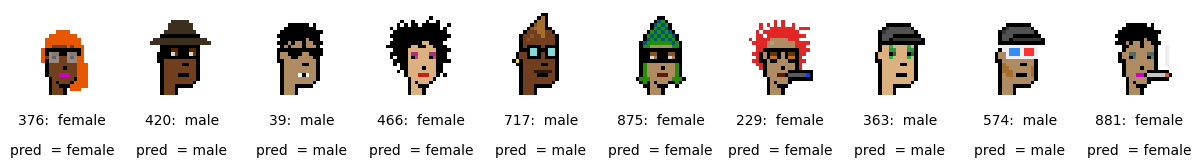

In [30]:
n = 10
indices = np.random.choice(range(len(X_test)), n)
fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = X_test[idx]
    ax = fig.add_subplot(1, n, i+1)
    ax.axis('off')
    ax.text(
        0.5,
        -0.35, 
        f"{idx}:  {str(actual_single[idx])}", 
        fontsize=10, 
        ha='center',
        transform=ax.transAxes
    )
    ax.text(
        0.5, 
        -0.70, 
        'pred  = ' + str(preds_single[idx]), 
        fontsize=10,  
        ha='center',
        transform=ax.transAxes
    )
    ax.imshow(img)